In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt #installs with osmnx
import pandas as pd
%matplotlib inline
ox.__version__

In [3]:
# get the network for Piedmont, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place("Paris, France"))
stats["circuity_avg"]

1.0377408863844562

In [4]:
# get the street network for a place, and its area in square meters
place = "Paris, France"
gdf = ox.geocode_to_gdf(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type="drive")

In [7]:
# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
pd.Series(stats)

n                                                                            9684
m                                                                           18714
k_avg                                                                    3.864932
edge_length_total                                                     1817259.652
edge_length_avg                                                          97.10696
streets_per_node_avg                                                     3.154791
streets_per_node_counts         {0: 0, 1: 542, 2: 155, 3: 6465, 4: 2328, 5: 17...
streets_per_node_proportions    {0: 0.0, 1: 0.05596860801321768, 2: 0.01600578...
intersection_count                                                           9142
street_length_total                                                   1492943.191
street_segment_count                                                        15172
street_length_avg                                                       98.401212
circuity_avg    

In [8]:
# unpack dicts into individiual keys:values
stats = ox.basic_stats(G, area=area)
for k, count in stats["streets_per_node_counts"].items():
    stats["{}way_int_count".format(k)] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats["{}way_int_prop".format(k)] = proportion

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats, name="value")).round(3)

value
n                           9684.000
m                          18714.000
k_avg                          3.865
edge_length_total        1817259.652
edge_length_avg               97.107
streets_per_node_avg           3.155
intersection_count          9142.000
street_length_total      1492943.191
street_segment_count       15172.000
street_length_avg             98.401
circuity_avg                   1.023
self_loop_proportion           0.001
node_density_km               91.954
intersection_density_km       86.808
edge_density_km            17255.770
street_density_km          14176.227
0way_int_count                 0.000
1way_int_count               542.000
2way_int_count               155.000
3way_int_count              6465.000
4way_int_count              2328.000
5way_int_count               173.000
6way_int_count                20.000
7way_int_count                 1.000
0way_int_prop                  0.000
1way_int_prop                  0.056
2way_int_prop                  0.016
3way_int_prop                  0.668
4way_int_prop                  0.240
5way_int_prop                  0.018
6way_int_prop                  0.002
7way_int_prop                  0.000

In [10]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(332476877, 0.1128095261389006)

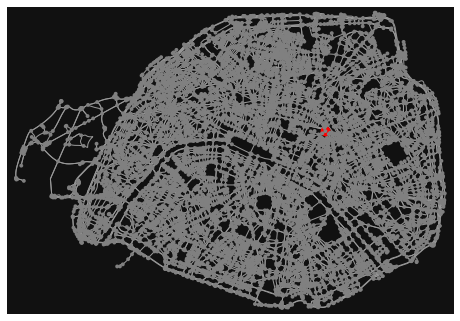

In [45]:
nc = ["r" if node == max_node else "grey" for node in G.nodes]
ns = [100 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=5)
plt.show()

ValueError: 'c' argument has 9763 elements, which is inconsistent with 'x' and 'y' with size 57892.

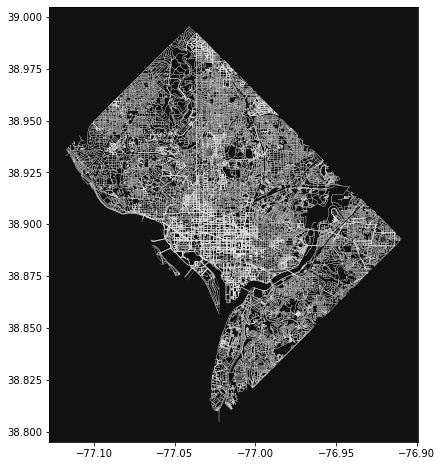

In [70]:
# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

In [14]:
# get the network for Piedmont, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place("Manhattan,New York,United States"))
stats["circuity_avg"]

1.0366712806100773

In [62]:
# get the network for Piedmont, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place("Washington DC, USA"))
stats["circuity_avg"]

1.0703804376938788

In [63]:
# get the street network for a place, and its area in square meters
place = "Washington DC, USA"
gdf = ox.geocode_to_gdf(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type="drive")

In [64]:
# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
pd.Series(stats)

n                                                                            9968
m                                                                           26844
k_avg                                                                    5.386035
edge_length_total                                                     3232719.267
edge_length_avg                                                        120.426139
streets_per_node_avg                                                     3.288624
streets_per_node_counts         {0: 0, 1: 572, 2: 72, 3: 5419, 4: 3735, 5: 153...
streets_per_node_proportions    {0: 0.0, 1: 0.05738362760834671, 2: 0.00722311...
intersection_count                                                           9396
street_length_total                                                   1946951.577
street_segment_count                                                        16286
street_length_avg                                                      119.547561
circuity_avg    

In [65]:
# unpack dicts into individiual keys:values
stats = ox.basic_stats(G, area=area)
for k, count in stats["streets_per_node_counts"].items():
    stats["{}way_int_count".format(k)] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats["{}way_int_prop".format(k)] = proportion

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats, name="value")).round(3)

value
n                           9968.000
m                          26844.000
k_avg                          5.386
edge_length_total        3232719.267
edge_length_avg              120.426
streets_per_node_avg           3.289
intersection_count          9396.000
street_length_total      1946951.577
street_segment_count       16286.000
street_length_avg            119.548
circuity_avg                   1.035
self_loop_proportion           0.004
node_density_km               56.250
intersection_density_km       53.023
edge_density_km            18242.570
street_density_km          10986.850
0way_int_count                 0.000
1way_int_count               572.000
2way_int_count                72.000
3way_int_count              5419.000
4way_int_count              3735.000
5way_int_count               153.000
6way_int_count                16.000
7way_int_count                 1.000
0way_int_prop                  0.000
1way_int_prop                  0.057
2way_int_prop                  0.007
3way_int_prop                  0.544
4way_int_prop                  0.375
5way_int_prop                  0.015
6way_int_prop                  0.002
7way_int_prop                  0.000

In [66]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(49773070, 0.12395625612685619)

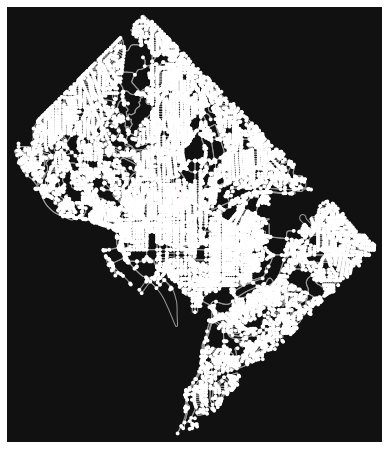

In [67]:
nc = ["r" if node == max_node else "w" for node in G.nodes]
ns = [80 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

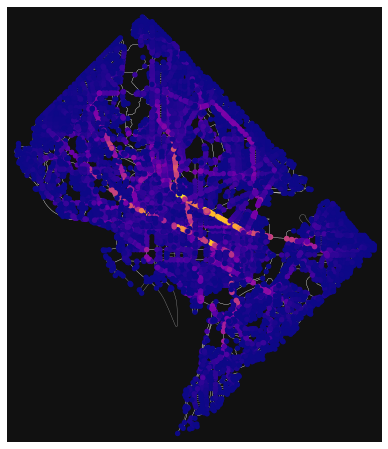

In [68]:
# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

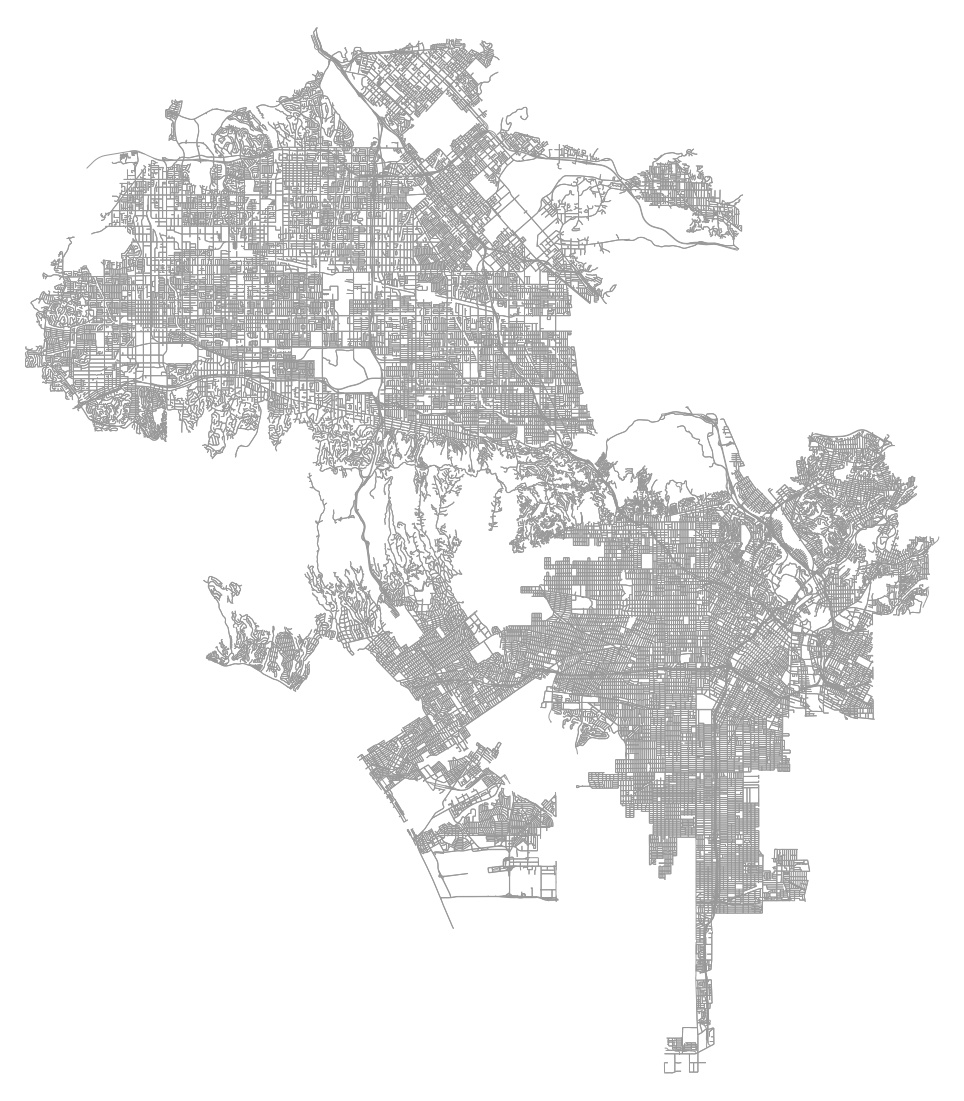

In [7]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Los Angeles,California,United States", network_type="drive")
fig, ax = ox.plot_graph(G,figsize=(20,20),bgcolor='#FFFFFF',
    node_color='black', node_size=0)


In [9]:
ox.speed.add_edge_speeds(G, hwy_speeds=None, fallback=None, precision=1)
ox.speed.add_edge_travel_times(G, precision=1)

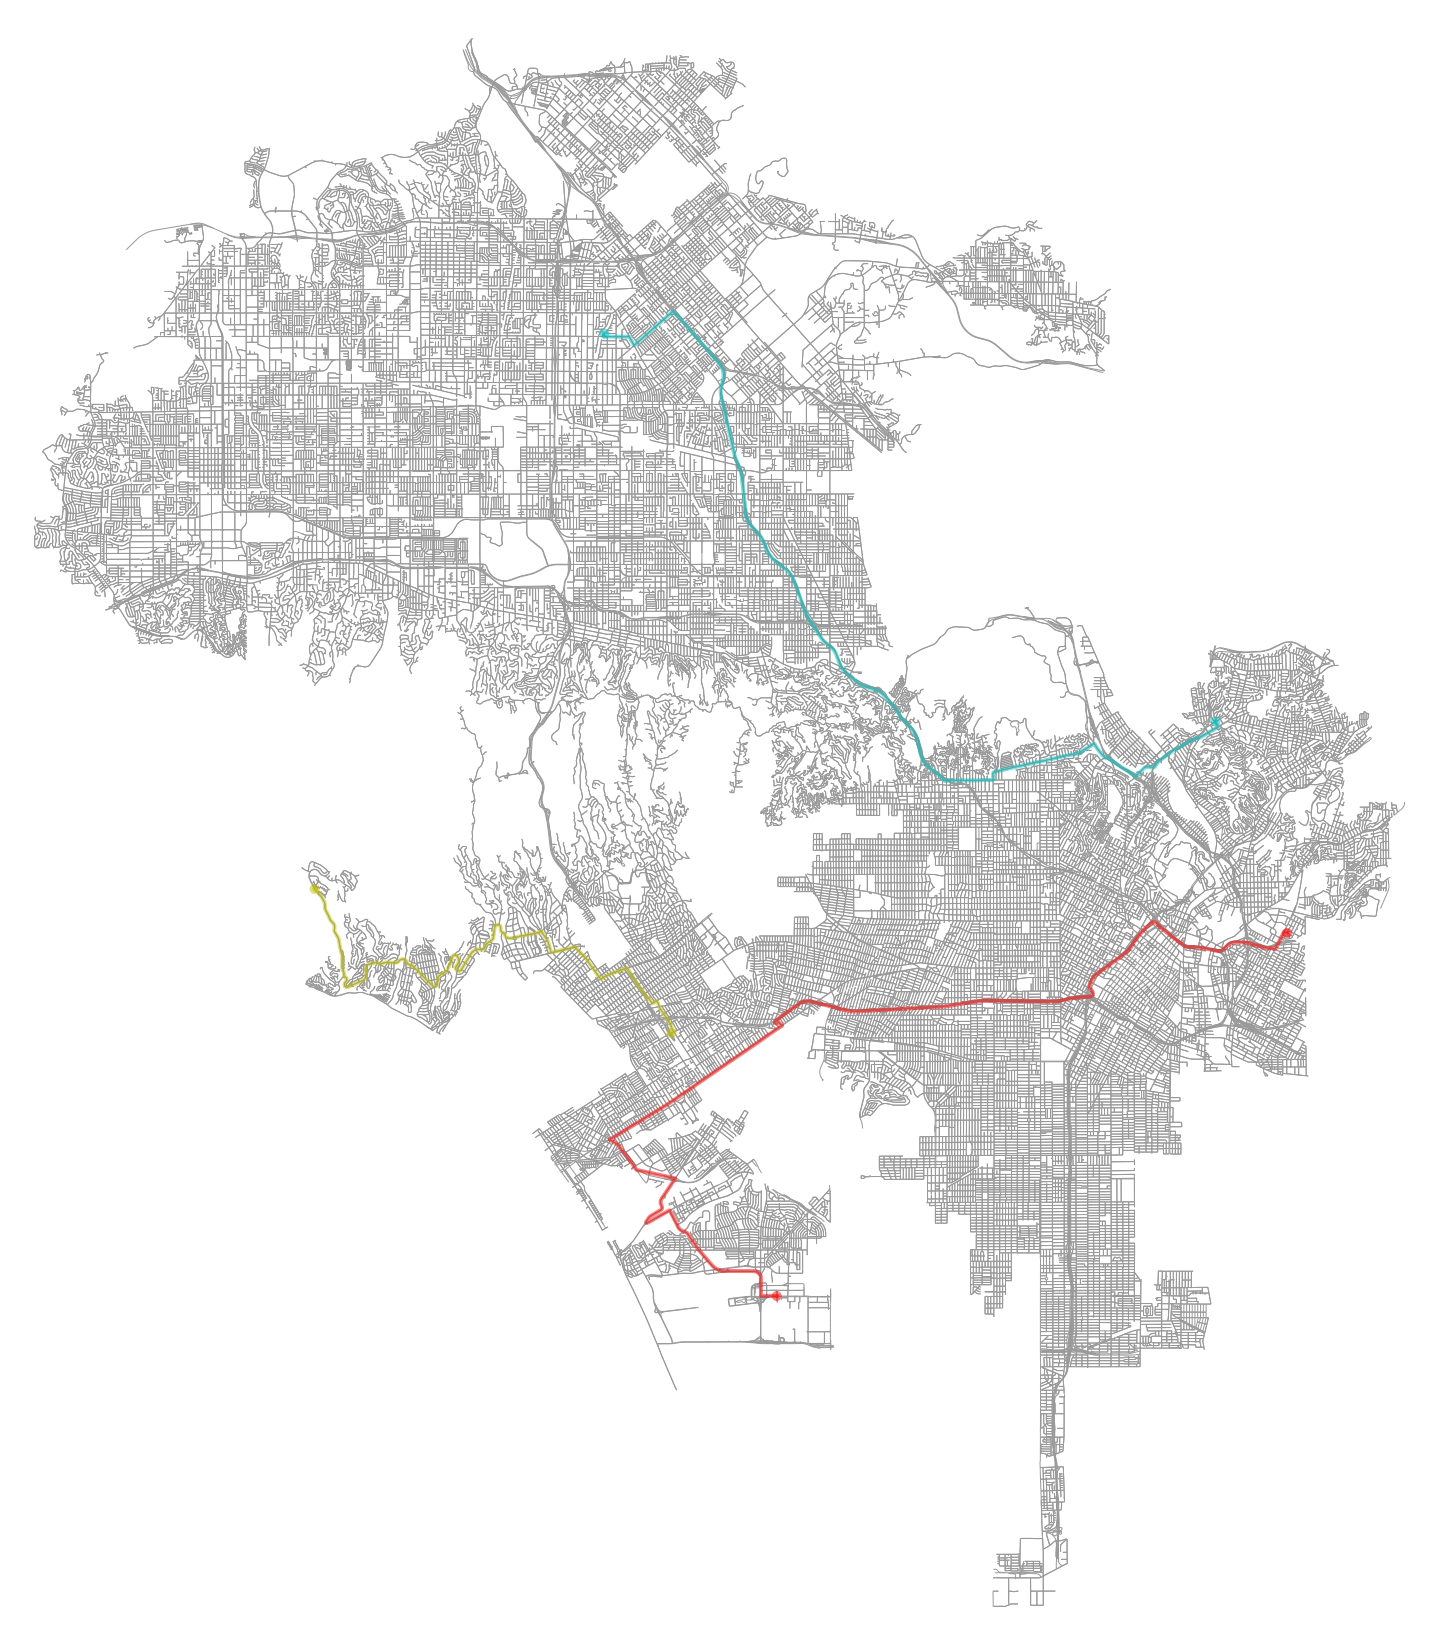

In [10]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

w = 'travel_time'
orig, dest = list(G)[10], list(G)[-10]
route1 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[0], list(G)[-1]
route2 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = list(G)[-100], list(G)[100]
route3 = nx.shortest_path(G, orig, dest, weight=w)

routes = [route1, route2, route3]
rc = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, figsize=(30, 30),node_size=0,bgcolor='#FFFFFF')

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/osmnx/graph.py:488: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)


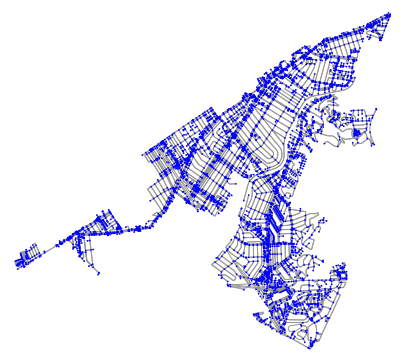

In [13]:
place_name = 'Culver City, California, United States'
G = ox.graph_from_place(place_name, clean_periphery=False,network_type="all_private")
fig, ax = ox.plot_graph(G,figsize=(7,7),bgcolor='#FFFFFF',
     node_color="b",node_size=3)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/osmnx/graph.py:488: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)


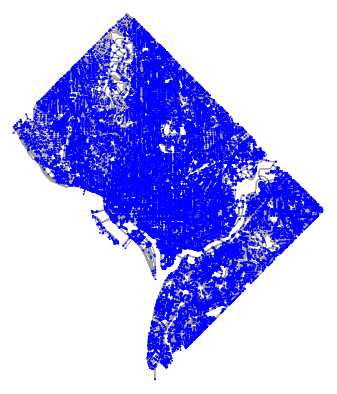

In [69]:
place_name = 'Washington DC, United States'
G = ox.graph_from_place(place_name, clean_periphery=False,network_type="all_private")
fig, ax = ox.plot_graph(G,figsize=(7,7),bgcolor='#FFFFFF',
     node_color="b",node_size=3)

In [57]:
place_name = "Culver City, California, United States"
graph = ox.graph_from_place(place_name, network_type='drive')

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


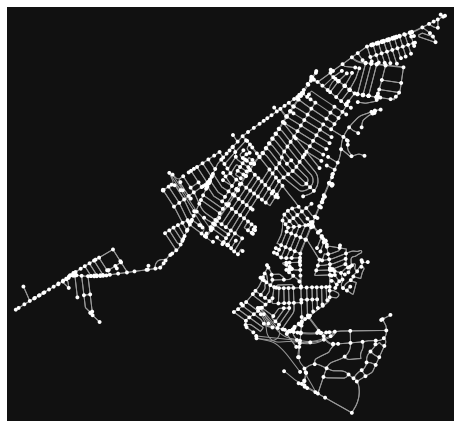

In [58]:
fig, ax = ox.plot_graph(graph)

In [59]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [60]:
# Check columns
edges.columns

Index(['osmid', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed',
       'reversed', 'length', 'geometry', 'bridge', 'tunnel', 'junction',
       'access'],
      dtype='object')

In [61]:
# Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
edges.head()

osmid  oneway   lanes    ref  \
u        v         key                                                  
653681   26427612  0     [49287146, 149003055]    True  [6, 5]  I 405   
15857094 195016378 0                 398208017   False       6    NaN   
         122996319 0    [398208006, 398208014]   False       5    NaN   
15857097 123280827 0                 383946358   False     NaN    NaN   
         122734445 0                 165880112   False     NaN    NaN   

                                             name      highway maxspeed  \
u        v         key                                                    
653681   26427612  0            San Diego Freeway     motorway   65 mph   
15857094 195016378 0       W Washington Boulevard    secondary      NaN   
         122996319 0       W Washington Boulevard    secondary      NaN   
15857097 123280827 0    West Washington Boulevard    secondary   35 mph   
         122734445 0               Mildred Avenue  residential      NaN   

                       reversed   length  \
u        v         key                     
653681   26427612  0      False  252.266   
15857094 195016378 0      False   20.118   
         122996319 0       True   86.509   
15857097 123280827 0       True   44.115   
         122734445 0      False  293.269   

                                                                 geometry  \
u        v         key                                                      
653681   26427612  0    LINESTRING (-118.40031 33.98940, -118.40087 33...   
15857094 195016378 0    LINESTRING (-118.43981 33.99445, -118.44000 33...   
         122996319 0    LINESTRING (-118.43981 33.99445, -118.43943 33...   
15857097 123280827 0    LINESTRING (-118.43226 33.99676, -118.43178 33...   
         122734445 0    LINESTRING (-118.43226 33.99676, -118.43224 33...   

                       bridge tunnel junction access  
u        v         key                                
653681   26427612  0      NaN    NaN      NaN    NaN  
15857094 195016378 0      NaN    NaN      NaN    NaN  
         122996319 0      NaN    NaN      NaN    NaN  
15857097 123280827 0      NaN    NaN      NaN    NaN  
         122734445 0      NaN    NaN      NaN    NaN

In [63]:
print(edges['highway'].value_counts())

residential       1130
secondary          464
tertiary           248
primary            130
unclassified        56
motorway_link       17
secondary_link      16
primary_link        14
motorway            12
tertiary_link        2
Name: highway, dtype: int64


/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


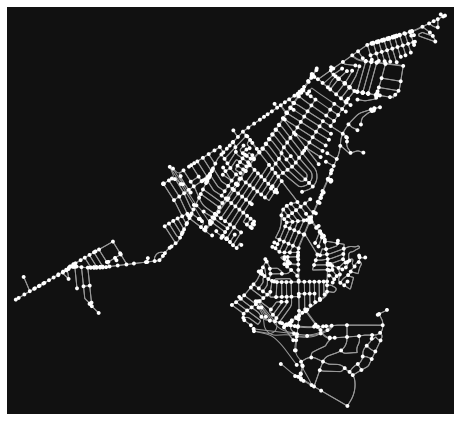

In [64]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [65]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [66]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [67]:
edges_proj.head()

osmid  oneway   lanes    ref  \
u         v         key                                                  
653681    26427612  0     [49287146, 149003055]    True  [6, 5]  I 405   
26427612  625976986 0                 759240583    True       6  I 405   
15857094  195016378 0                 398208017   False       6    NaN   
          122996319 0    [398208006, 398208014]   False       5    NaN   
195016378 15857094  0                 398208017   False       6    NaN   

                                           name    highway maxspeed reversed  \
u         v         key                                                        
653681    26427612  0         San Diego Freeway   motorway   65 mph    False   
26427612  625976986 0         San Diego Freeway   motorway   65 mph    False   
15857094  195016378 0    W Washington Boulevard  secondary      NaN    False   
          122996319 0    W Washington Boulevard  secondary      NaN     True   
195016378 15857094  0    W Washington Boulevard  secondary      NaN     True   

                          length  \
u         v         key            
653681    26427612  0    252.266   
26427612  625976986 0    116.992   
15857094  195016378 0     20.118   
          122996319 0     86.509   
195016378 15857094  0     20.118   

                                                                  geometry  \
u         v         key                                                      
653681    26427612  0    LINESTRING (370663.103 3761864.529, 370612.585...   
26427612  625976986 0    LINESTRING (370529.299 3762077.999, 370467.586...   
15857094  195016378 0    LINESTRING (367022.606 3762474.458, 367005.323...   
          122996319 0    LINESTRING (367022.606 3762474.458, 367058.282...   
195016378 15857094  0    LINESTRING (367005.323 3762464.131, 367022.606...   

                        tunnel bridge junction access  
u         v         key                                
653681    26427612  0      NaN    NaN      NaN    NaN  
26427612  625976986 0      NaN    NaN      NaN    NaN  
15857094  195016378 0      NaN    NaN      NaN    NaN  
          122996319 0      NaN    NaN      NaN    NaN  
195016378 15857094  0      NaN    NaN      NaN    NaN

In [68]:
from pyproj import CRS
CRS(edges_proj.crs).to_epsg()

32611

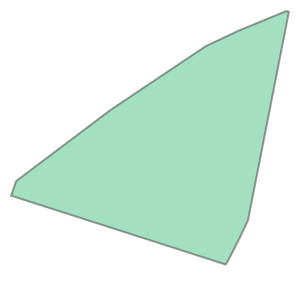

In [71]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull


In [85]:
# Calculate the area
area = convex_hull.area





In [15]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m



23434523.738170035

In [16]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)



{'n': 5609,
 'm': 15784,
 'k_avg': 5.628097700124799,
 'edge_length_total': 759962.3700000029,
 'edge_length_avg': 48.14764128231138,
 'streets_per_node_avg': 3.011588518452487,
 'streets_per_node_counts': {0: 0,
  1: 798,
  2: 42,
  3: 3106,
  4: 1628,
  5: 30,
  6: 5},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.14227134961668747,
  2: 0.0074879657692993404,
  3: 0.5537528971296132,
  4: 0.29024781600998395,
  5: 0.005348546978070958,
  6: 0.0008914244963451596},
 'intersection_count': 4811,
 'street_length_total': 410945.3080000025,
 'street_segment_count': 8457,
 'street_length_avg': 48.5923268298454,
 'circuity_avg': 1.0743392582907738,
 'self_loop_proportion': 0.003310866737613811,
 'clean_intersection_count': 1279,
 'node_density_km': 239.34772742422277,
 'intersection_density_km': 205.29540321589155,
 'edge_density_km': 32429.179209739177,
 'street_density_km': 17535.893308156155,
 'clean_intersection_density_km': 54.57759732137296}

In [71]:
place = "Culver City, California"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags={'building':True})
gdf.shape

(14668, 132)

In [72]:
# get all building footprints in some neighborhood
place = "Culver City, California"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(14668, 132)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


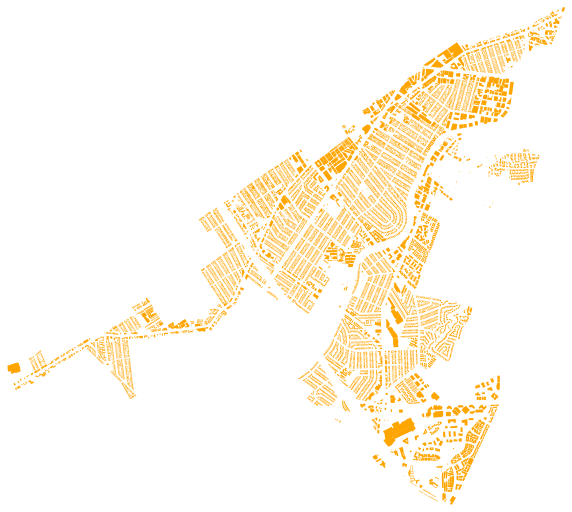

In [73]:
fig, ax = ox.plot_footprints(gdf, figsize=(10, 10),bgcolor='#FFFFFF')

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in

<AxesSubplot:>

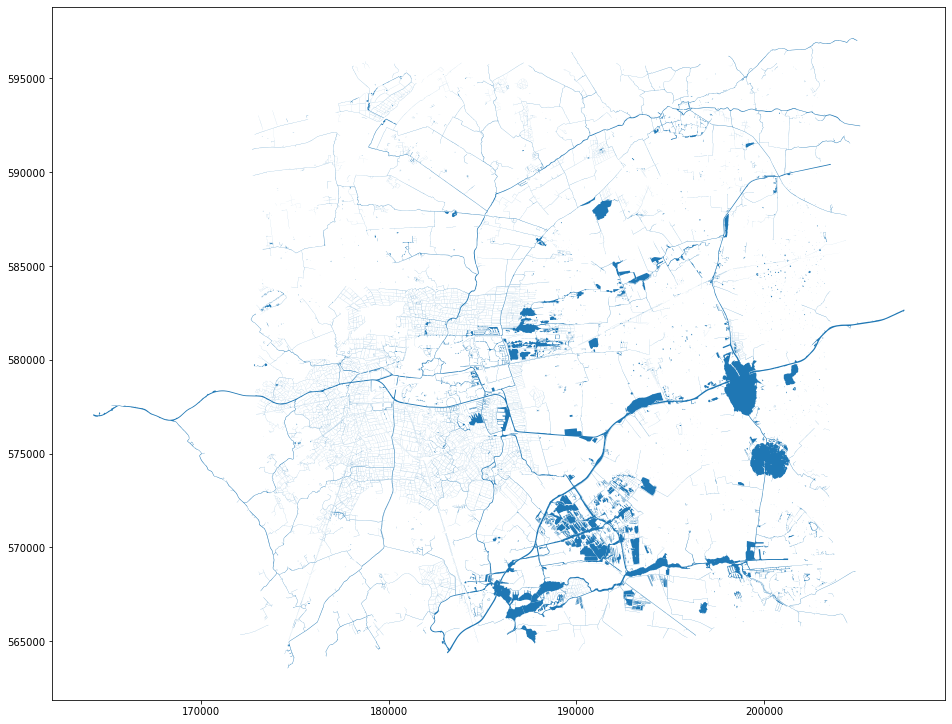

In [28]:
gdf=ox.geometries.geometries_from_address((52.3716,4.9005),dist=15000, tags={'natural':'water','highway':''})
gdf.to_crs(epsg=28992, inplace=True)
gdf.plot(figsize=(16,16))

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersi

<AxesSubplot:>

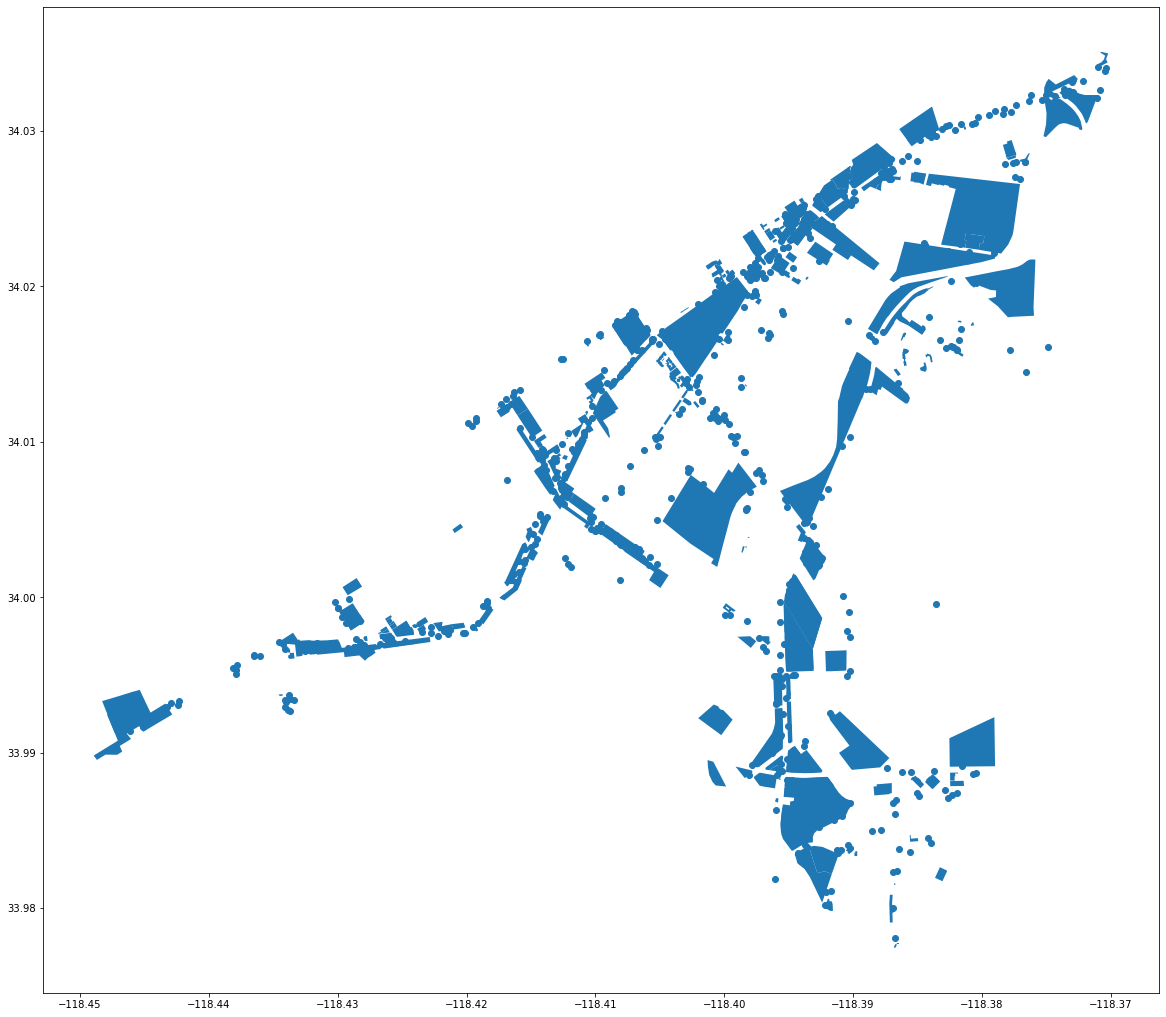

In [74]:
# get everything tagged amenity,
# and everything tagged landuse = retail or commercial,
# and everything tagged highway = bus_stop
tags = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
gdf = ox.geometries_from_place("Culver City, California, USA", tags)
gdf.shape
gdf.plot(figsize=(20,29))


In [76]:
# view just the banks
gdf[gdf["amenity"] == "bank"].dropna(axis=1, how="any")



amenity  \
element_type osmid                
node         3181900796    bank   
             6109859997    bank   
             8336631380    bank   
             8347964371    bank   
             8462756038    bank   
             8547936014    bank   
             8868651740    bank   
             9027126479    bank   
             9176912213    bank   
way          391033607     bank   
             421669794     bank   
             421953289     bank   
             421953319     bank   
             422046032     bank   
             422269852     bank   

                                                                      name  \
element_type osmid                                                           
node         3181900796                                           Citibank   
             6109859997  Los Angeles Federal Credit Union - Culver City...   
             8336631380                                       OneWest Bank   
             8347964371                                              Chase   
             8462756038                                          U.S. Bank   
             8547936014                                             Wescom   
             8868651740                   First Entertainment Credit Union   
             9027126479                                         Union Bank   
             9176912213                                First Citizens Bank   
way          391033607                                               Chase   
             421669794                                     Bank of America   
             421953289                                               Chase   
             421953319                                         Wells Fargo   
             422046032                                     Bank of America   
             422269852                                     Bank of America   

                                                                  geometry  
element_type osmid                                                          
node         3181900796                        POINT (-118.39509 33.98827)  
             6109859997                        POINT (-118.40664 34.01672)  
             8336631380                        POINT (-118.39372 34.00289)  
             8347964371                        POINT (-118.39243 34.00256)  
             8462756038                        POINT (-118.39566 33.99530)  
             8547936014                        POINT (-118.39494 33.99814)  
             8868651740                        POINT (-118.41118 34.00998)  
             9027126479                        POINT (-118.42889 33.99885)  
             9176912213                        POINT (-118.39567 33.99103)  
way          391033607   POLYGON ((-118.39690 34.02249, -118.39672 34.0...  
             421669794   POLYGON ((-118.42736 33.99660, -118.42749 33.9...  
             421953289   POLYGON ((-118.39490 33.98897, -118.39490 33.9...  
             421953319   POLYGON ((-118.39009 33.98368, -118.39012 33.9...  
             422046032   POLYGON ((-118.39563 33.99261, -118.39562 33.9...  
             422269852   POLYGON ((-118.40816 34.01757, -118.40828 34.0...

In [35]:
# view just the bus stops
gdf[gdf["highway"] == "bus_stop"].dropna(axis=1, how="any").head()

geometry  bus public_transport  \
element_type osmid                                                           
node         3254606627  POINT (-118.38660 33.98239)  yes         platform   
             3254606628  POINT (-118.38689 33.98235)  yes         platform   
             3445774682  POINT (-118.38071 33.98862)  yes         platform   
             3881073410  POINT (-118.39478 33.98792)  yes         platform   
             3881073411  POINT (-118.39477 33.98807)  yes         platform   

                          highway                     network  
element_type osmid                                             
node         3254606627  bus_stop                 Metro Local  
             3254606628  bus_stop                 Metro Local  
             3445774682  bus_stop  Culver CityBus;Metro Local  
             3881073410  bus_stop              Culver CityBus  
             3881073411  bus_stop              Culver CityBus

In [38]:
import networkx as nx
import osmnx as ox
from IPython.display import IFrame

In [39]:
# plot the street network with folium
m1 = ox.plot_graph_folium(G, popup_attribute="name", weight=2, color="#8b0000")

In [40]:
# save as html file then display map as an iframe
filepath = "data/graph.html"
m1.save(filepath)
IFrame(filepath, width=600, height=500)

In [50]:
# get all the building footprints in a city
gdf = ox.geometries_from_place("Culver City, California, USA", {"building": True})
gdf.shape

(14670, 132)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


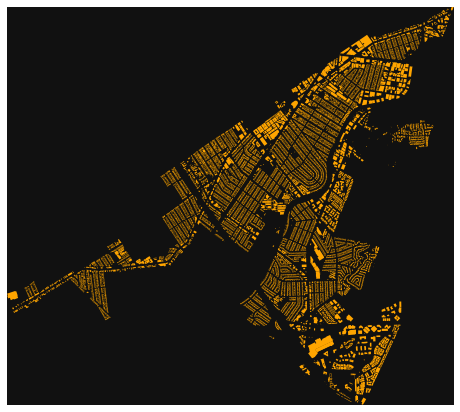

In [51]:
fig, ax = ox.plot_footprints(gdf)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersi

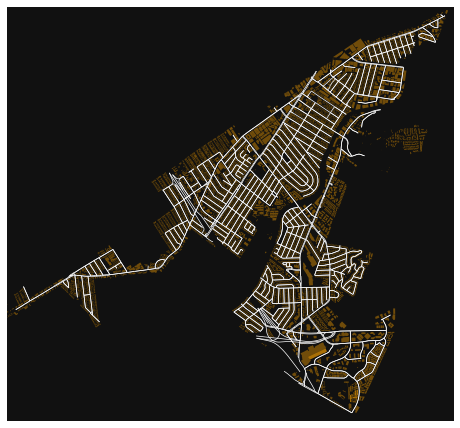

In [52]:
# or plot street network and the entities' footprints together
fig, ax = ox.plot_footprints(gdf, alpha=0.4, show=False)
fig, ax = ox.plot_graph(G, ax=ax, node_size=0, edge_color="w", edge_linewidth=0.7)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon

%matplotlib inline
ox.__version__

'1.2.1'

In [47]:
# configure the place, network type, trip times, and travel speed
place = {"city": "Culver City", "state": "California"}
network_type = "walk"
trip_times = [5, 10, 15, 20, 25]  # in minutes
travel_speed = 4.5  # walking speed in km/hour

In [48]:
# download the street network
G = ox.graph_from_place(place, network_type=network_type)

In [49]:
# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes["geometry"].unary_union.centroid.xy
center_node = ox.distance.nearest_nodes(G, x[0], y[0])
G = ox.project_graph(G)

In [50]:
# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute

In [51]:
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0, return_hex=True)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


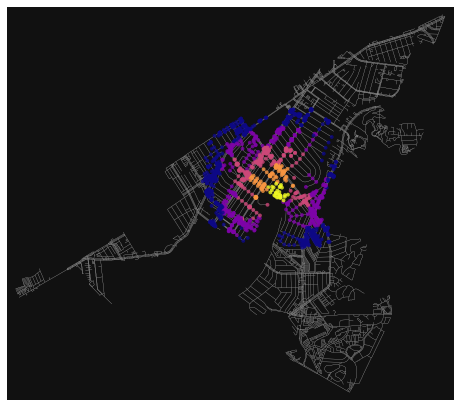

In [52]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


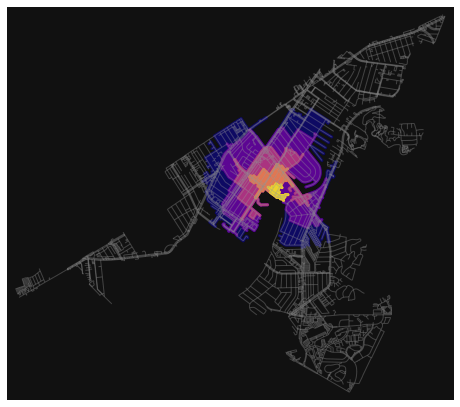

In [53]:
def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")

        node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({"id": list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index("id")

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get("geometry", LineString([f, t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union

        # try to fill in surrounded areas so shapes will appear solid and
        # blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys


isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.7, zorder=-1)
    ax.add_patch(patch)
plt.show()

In [19]:
# make the isochrone polygons
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


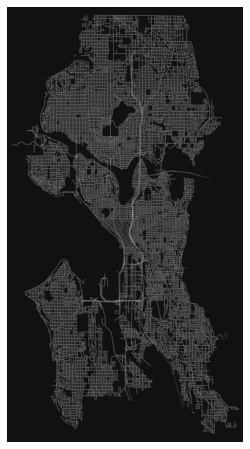

In [40]:
# plot the network then add isochrones as colored descartes polygon patches
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0
)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

In [91]:
import matplotlib.pyplot as plt
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon

In [92]:
# get the place boundaries
place = "Seattle, Washington"
gdf = ox.geocode_to_gdf(place)

# get the street network, with retain_all=True to retain all the disconnected islands' networks
G = ox.graph_from_place(place, network_type="drive", retain_all=True)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


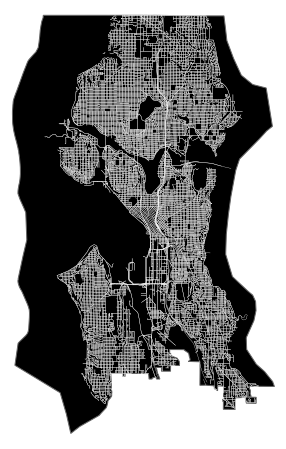

In [93]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="white",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)

# to this matplotlib axis, add the place shape as descartes polygon patches
for geometry in gdf["geometry"].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry.geoms:
            patch = PolygonPatch(polygon, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)
            ax.add_patch(patch)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

In [94]:
islands = ox.geometries_from_place(place, tags={"place": ["island", "islet"]})
islands.shape

(23, 19)

In [36]:
plt.show()

In [95]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

314091477.0924825

Rerunning new section

In [62]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd


In [63]:
place_name = "Paris, France"
graph = ox.graph_from_place(place_name, network_type='drive')


Default face color is:  (0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 1.0)

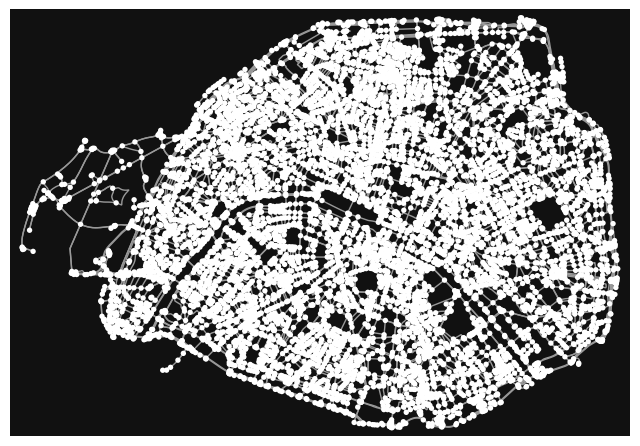

In [64]:

fig, ax = ox.plot_graph(graph)




In [26]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [27]:
# Check columns
edges.columns

Index(['osmid', 'name', 'highway', 'maxspeed', 'oneway', 'reversed', 'length',
       'lanes', 'geometry', 'junction', 'width', 'bridge', 'tunnel', 'access',
       'ref'],
      dtype='object')

In [28]:
# Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
edges.head()

osmid                 name  \
u      v          key                                                
125730 268675130  0                 315818975  Rue Henri Duvernois   
       21112878   0                  31093720    Rue Louis Lumière   
       244455548  0                  85735969    Rue Louis Lumière   
       1089076182 0    [266463585, 611974677]      Rue Louis Ganne   
125742 60912980   0                   4039102      Rue de Buzenval   

                           highway maxspeed  oneway reversed   length lanes  \
u      v          key                                                         
125730 268675130  0    residential       30   False     True    8.707   NaN   
       21112878   0    residential       30   False    False  142.342     2   
       244455548  0    residential       30   False     True  105.925     2   
       1089076182 0    residential       30   False     True  128.653     2   
125742 60912980   0    residential       30    True    False  131.074   NaN   

                                                                geometry  \
u      v          key                                                      
125730 268675130  0      LINESTRING (2.41073 48.86352, 2.41083 48.86348)   
       21112878   0    LINESTRING (2.41073 48.86352, 2.41046 48.86425...   
       244455548  0    LINESTRING (2.41073 48.86352, 2.41077 48.86337...   
       1089076182 0    LINESTRING (2.41073 48.86352, 2.41061 48.86351...   
125742 60912980   0    LINESTRING (2.40137 48.85185, 2.40134 48.85193...   

                      junction width bridge tunnel access  ref  
u      v          key                                           
125730 268675130  0        NaN   NaN    NaN    NaN    NaN  NaN  
       21112878   0        NaN   NaN    NaN    NaN    NaN  NaN  
       244455548  0        NaN   NaN    NaN    NaN    NaN  NaN  
       1089076182 0        NaN   NaN    NaN    NaN    NaN  NaN  
125742 60912980   0        NaN   NaN    NaN    NaN    NaN  NaN

In [30]:
print(edges['highway'].value_counts())

residential                                   8901
primary                                       2984
tertiary                                      2548
secondary                                     2542
unclassified                                   648
living_street                                  458
trunk_link                                     194
trunk                                          146
primary_link                                   118
[residential, living_street]                    41
secondary_link                                  37
[unclassified, residential]                     30
tertiary_link                                   20
motorway_link                                   16
[unclassified, living_street]                    4
[tertiary, living_street]                        4
motorway                                         4
[primary, secondary]                             3
[primary, tertiary]                              3
[residential, tertiary]        

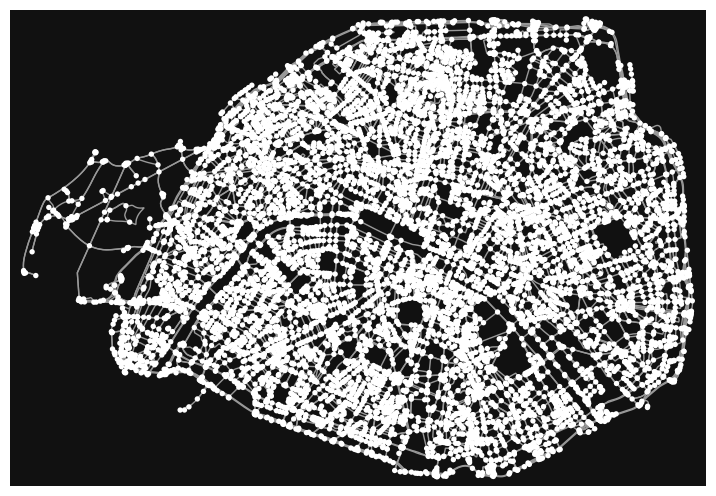

In [31]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [32]:
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [33]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [34]:
edges_proj.head()

osmid                 name  \
u         v          key                                                
125730    268675130  0                 315818975  Rue Henri Duvernois   
          21112878   0                  31093720    Rue Louis Lumière   
          244455548  0                  85735969    Rue Louis Lumière   
          1089076182 0    [266463585, 611974677]      Rue Louis Ganne   
268675130 125730     0                 315818975  Rue Henri Duvernois   

                              highway maxspeed  oneway reversed   length  \
u         v          key                                                   
125730    268675130  0    residential       30   False     True    8.707   
          21112878   0    residential       30   False    False  142.342   
          244455548  0    residential       30   False     True  105.925   
          1089076182 0    residential       30   False     True  128.653   
268675130 125730     0    residential       30   False    False    8.707   

                                                                   geometry  \
u         v          key                                                      
125730    268675130  0    LINESTRING (456781.901 5412451.867, 456789.384...   
          21112878   0    LINESTRING (456781.901 5412451.867, 456762.909...   
          244455548  0    LINESTRING (456781.901 5412451.867, 456784.558...   
          1089076182 0    LINESTRING (456781.901 5412451.867, 456773.325...   
268675130 125730     0    LINESTRING (456789.384 5412447.384, 456781.901...   

                         lanes junction  ref width access tunnel bridge  
u         v          key                                                 
125730    268675130  0     NaN      NaN  NaN   NaN    NaN    NaN    NaN  
          21112878   0       2      NaN  NaN   NaN    NaN    NaN    NaN  
          244455548  0       2      NaN  NaN   NaN    NaN    NaN    NaN  
          1089076182 0       2      NaN  NaN   NaN    NaN    NaN    NaN  
268675130 125730     0     NaN      NaN  NaN   NaN    NaN    NaN    NaN

In [36]:
from pyproj import CRS
CRS(edges_proj.crs).to_epsg()

32631

In [37]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj)
stats

{'n': 9684,
 'm': 18714,
 'k_avg': 3.864931846344486,
 'edge_length_total': 1817259.6520000075,
 'edge_length_avg': 97.10696013679637,
 'streets_per_node_avg': 3.154791408508881,
 'streets_per_node_counts': {0: 0,
  1: 542,
  2: 155,
  3: 6465,
  4: 2328,
  5: 173,
  6: 20,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.05596860801321768,
  2: 0.01600578273440727,
  3: 0.6675960346964065,
  4: 0.24039653035935563,
  5: 0.017864518793886824,
  6: 0.0020652622883106154,
  7: 0.00010326311441553078},
 'intersection_count': 9142,
 'street_length_total': 1492943.1910000003,
 'street_segment_count': 15172,
 'street_length_avg': 98.40121216715004,
 'circuity_avg': 1.0219278587392524,
 'self_loop_proportion': 0.0011863959926179805}

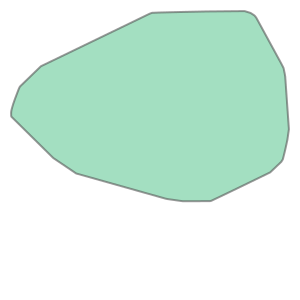

In [38]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [67]:
graph_proj = ox.project_graph(graph)


nodes_proj = ox.graph_to_gdfs(graph_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m


99712334.31236604

In [41]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.basic_stats(graph_proj)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value

# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

n                                                                            9684
m                                                                           18714
k_avg                                                                    3.864932
edge_length_total                                                     1817259.652
edge_length_avg                                                          97.10696
streets_per_node_avg                                                     3.154791
streets_per_node_counts         {0: 0, 1: 542, 2: 155, 3: 6465, 4: 2328, 5: 17...
streets_per_node_proportions    {0: 0.0, 1: 0.05596860801321768, 2: 0.01600578...
intersection_count                                                           9142
street_length_total                                                   1492943.191
street_segment_count                                                        15172
street_length_avg                                                       98.401212
circuity_avg    

In [44]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Centroid
centroid = convex_hull.centroid

# Show
print(centroid)

POINT (450945.2789516679 5411983.924698958)


In [45]:
nodes_proj.head()

y              x  street_count       lon        lat  \
osmid                                                                        
125730      5.412452e+06  456781.900993             4  2.410732  48.863523   
268675130   5.412447e+06  456789.384246             3  2.410834  48.863483   
21112878    5.412587e+06  456738.270896             4  2.410123  48.864732   
244455548   5.412347e+06  456794.553236             4  2.410915  48.862578   
1089076182  5.412435e+06  456653.981492             3  2.408990  48.863365   

           highway  ref                        geometry  
osmid                                                    
125730         NaN  NaN  POINT (456781.901 5412451.867)  
268675130      NaN  NaN  POINT (456789.384 5412447.384)  
21112878       NaN  NaN  POINT (456738.271 5412586.630)  
244455548      NaN  NaN  POINT (456794.553 5412346.737)  
1089076182     NaN  NaN  POINT (456653.981 5412435.305)

In [46]:
# Get the x coordinates of the nodes
nodes_proj['x'] = nodes_proj["x"].astype(float)

In [47]:
# Retrieve the maximum x value (i.e. the most eastern)
maxx = nodes_proj['x'].max()
print(maxx)

457172.0738124813


In [48]:
# Retrieve the node that is the most eastern one and get the Shapely Point geometry out of it
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
print(target)

POINT (457172.0738124813 5410860.530381502)


/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


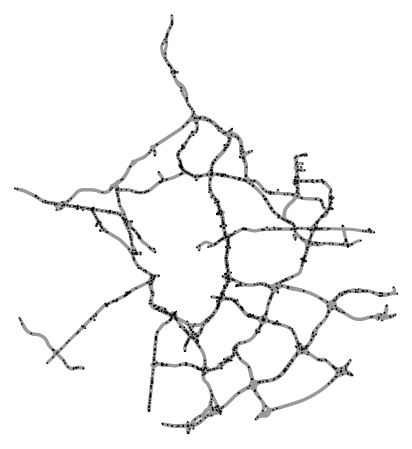

In [77]:
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link"]'
G = ox.graph_from_place("Madrid", network_type="drive", custom_filter=cf)
fig, ax = ox.plot_graph(G, node_size=3,node_color='black',edge_linewidth=3,bgcolor='#FFFFFF')


/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/osmnx/geometries.py:872: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get t

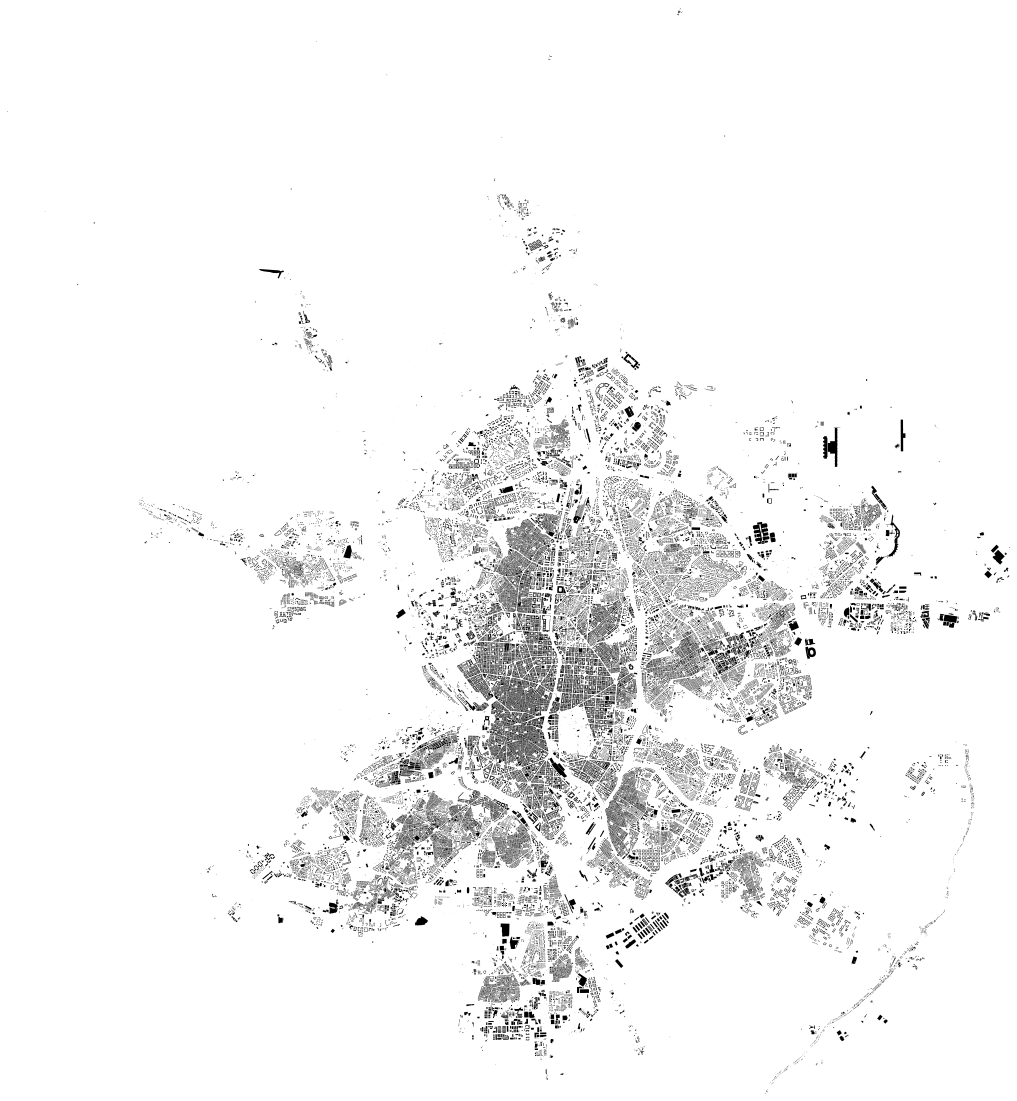

In [78]:
place = "Madrid, Spain"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
fig, ax = ox.plot_footprints(gdf, figsize=(20, 20),alpha=1,color='black',bgcolor='#FFFFFF',save=True,filepath='settings.imgs_folder/image.png',show=True,dpi=600)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


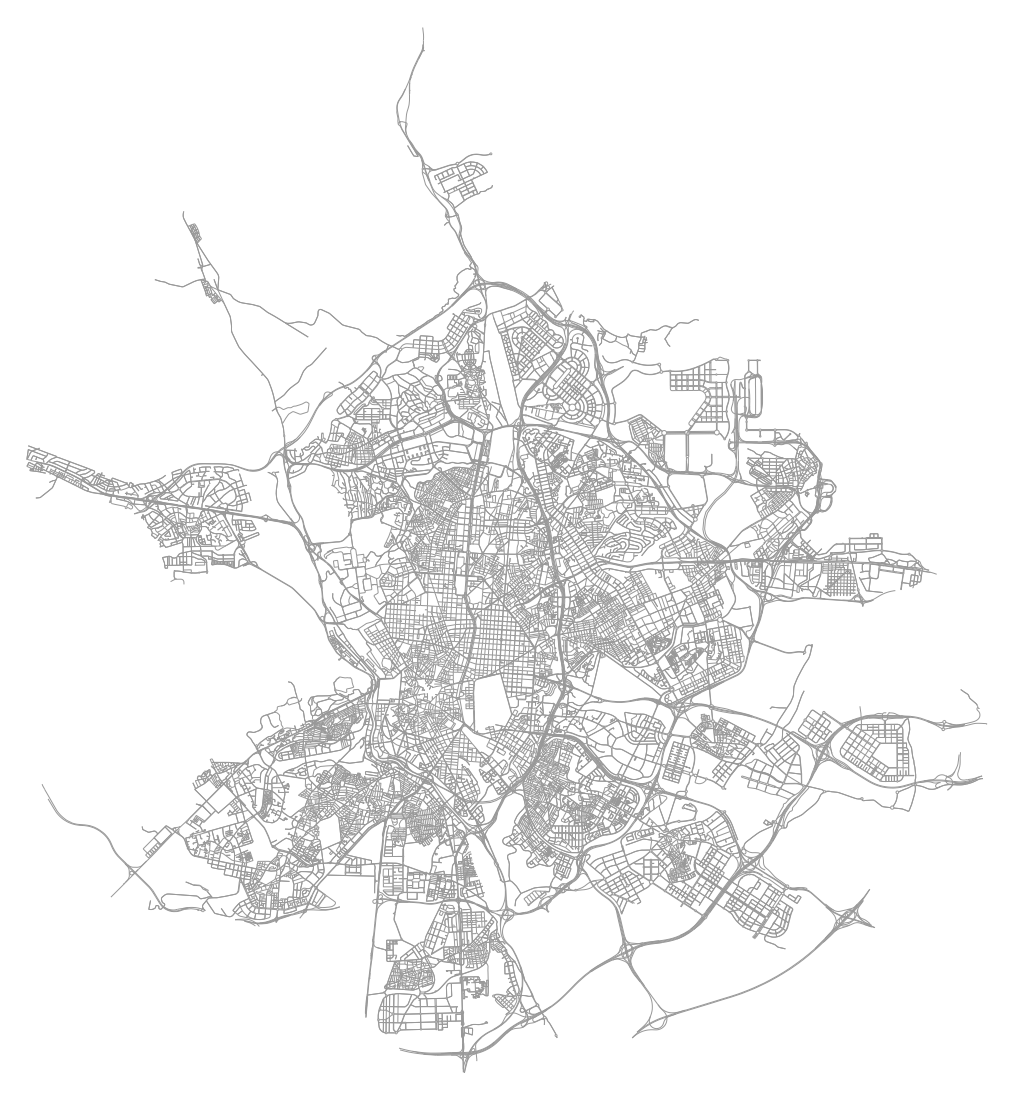

In [79]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 
place_name = 'Madrid,Spain'
G = ox.graph_from_place(place_name,network_type="drive")
fig, ax = ox.plot_graph(G,figsize=(20,20),bgcolor='#FFFFFF',
    node_color='black', node_size=0)

/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/Users/bonnymcclain/opt/miniconda3/envs/geo/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


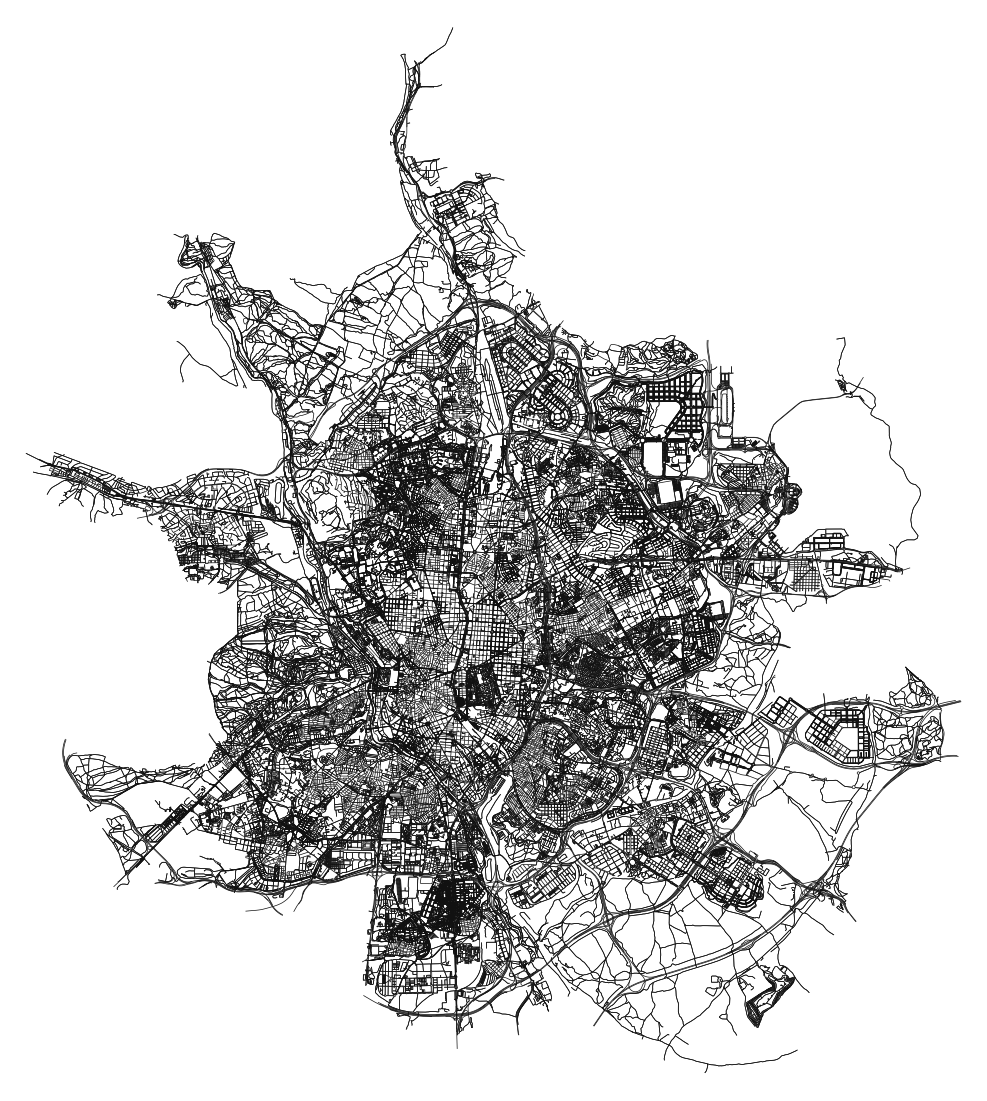

In [80]:
G = ox.graph_from_place(
    "Madrid, Spain",network_type="all",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    
)

fig, ax = ox.plot_graph(G, figsize=(20, 20),node_size=0, edge_color="#111111", edge_linewidth=0.7,bgcolor='#FFFFFF')